## FEATURE SELECTION AND SCALING

In [2]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
df = pd.read_csv('combined_spotify_data.csv')  # From earlier

In [3]:
X = df.drop('popularity', axis=1)
y = df['popularity']
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape

(3864, 14)

In [5]:
y_train.shape

(3864,)

In [6]:
X

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,key,duration_ms,time_signature,playlist_genre
0,0.592,157.969,0.521,-7.777,0.1220,0.535,0.0304,0.0000,0.3080,0.0,6.0,251668.0,3.0,pop
1,0.507,104.978,0.747,-10.171,0.1170,0.438,0.0358,0.0608,0.2000,1.0,2.0,210373.0,4.0,pop
2,0.808,108.548,0.554,-4.169,0.1590,0.372,0.0368,0.0000,0.2140,1.0,1.0,166300.0,4.0,pop
3,0.910,112.966,0.670,-4.070,0.3040,0.786,0.0634,0.0000,0.0939,0.0,0.0,157280.0,4.0,pop
4,0.783,149.027,0.777,-4.477,0.3550,0.939,0.2600,0.0000,0.0283,0.0,0.0,169917.0,4.0,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4826,0.424,75.466,0.352,-8.009,0.2420,0.605,0.0634,0.0000,0.9650,1.0,10.0,661293.0,1.0,indian
4827,0.349,147.193,0.471,-16.633,0.2860,0.358,0.0656,0.9450,0.9750,1.0,8.0,394400.0,4.0,indian
4828,0.595,174.308,0.436,-11.494,0.0939,0.870,0.0671,0.8680,0.8160,1.0,3.0,473440.0,4.0,indian
4829,0.591,174.760,0.489,-10.843,0.0770,0.689,0.0813,0.9270,0.9480,0.0,8.0,298987.0,1.0,indian


In [7]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4826    0
4827    0
4828    0
4829    0
4830    0
Name: popularity, Length: 4831, dtype: int64

In [8]:
X_train

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,acousticness,mode,key,duration_ms,time_signature,playlist_genre
3649,0.00109,70.223,0.0654,-46.556,0.0981,0.125,0.0414,0.831000,0.99100,1.0,9.0,175500.0,4.0,wellness
4106,0.71200,143.989,0.4950,-6.509,0.3180,0.386,0.1800,0.000000,0.41400,0.0,10.0,325563.0,4.0,latin
3814,0.78500,91.986,0.7810,-6.773,0.1340,0.644,0.2570,0.000000,0.26400,0.0,4.0,211974.0,4.0,world
535,0.68700,123.010,0.7550,-6.247,0.1250,0.381,0.1010,0.000177,0.18300,0.0,8.0,265360.0,4.0,gaming
2638,0.41500,74.989,0.7010,-17.812,0.1090,0.326,0.0663,0.886000,0.44200,1.0,0.0,127058.0,4.0,lofi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.48700,85.706,0.3250,-8.512,0.2880,0.489,0.0297,0.000001,0.14300,1.0,5.0,249333.0,4.0,electronic
466,0.78200,119.992,0.7270,-8.529,0.2250,0.655,0.0420,0.336000,0.05630,0.0,8.0,177599.0,4.0,gaming
3092,0.59900,102.119,0.8610,-4.205,0.0921,0.869,0.2460,0.000000,0.18300,1.0,1.0,186893.0,4.0,latin
3772,0.77800,94.996,0.6960,-4.653,0.3290,0.410,0.0585,0.000000,0.35200,0.0,1.0,218897.0,4.0,korean


In [9]:
y_train

3649    0
4106    0
3814    0
535     1
2638    0
       ..
4426    0
466     1
3092    0
3772    0
860     1
Name: popularity, Length: 3864, dtype: int64

In [10]:
features = ['energy', 'danceability', 'loudness', 'acousticness', 'duration_ms']

In [11]:
from sklearn.preprocessing import FunctionTransformer

In [12]:
def basic_gen(X):
    X_out = X.copy()
    # Ratios
    X_out['energy_dance'] = X['energy'] * X['danceability']
    X_out['loud_acoustic'] = X['loudness'] / (X['acousticness'] + 1e-6)
    # Log skew (duration)
    X_out['log_duration'] = np.log1p(X['duration_ms'])
    # Bins (ordinal)
    X_out['energy_bin'] = pd.cut(X['energy'], bins=3, labels=[0,1,2])  # Low=0, Med=1, High=2
    return X_out[features + ['energy_dance', 'loud_acoustic', 'log_duration', 'energy_bin']]

In [13]:
gen_tf = FunctionTransformer(basic_gen)
X_train_gen = gen_tf.fit_transform(X_train)
X_test_gen = gen_tf.transform(X_test)

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train_gen)
X_test_std = std_scaler.transform(X_test_gen)

# MinMaxScaler [0,1]
mm_scaler = MinMaxScaler()
X_train_mm = mm_scaler.fit_transform(X_train_gen)
X_test_mm = mm_scaler.transform(X_test_gen)

# To DF
feat_names = X_train_gen.columns
X_train_std = pd.DataFrame(X_train_std, columns=feat_names)
X_test_std = pd.DataFrame(X_test_std, columns=feat_names)
X_train_mm = pd.DataFrame(X_train_mm, columns=feat_names)
X_test_mm = pd.DataFrame(X_test_mm, columns=feat_names)

print("Std means:", X_train_std.mean().round(2))
print("MM range:", X_train_mm.min().round(2), "to", X_train_mm.max().round(2))

Std means: energy          -0.0
danceability    -0.0
loudness        -0.0
acousticness     0.0
duration_ms      0.0
energy_dance    -0.0
loud_acoustic    0.0
log_duration     0.0
energy_bin       0.0
dtype: float64
MM range: energy           0.0
danceability     0.0
loudness         0.0
acousticness     0.0
duration_ms      0.0
energy_dance     0.0
loud_acoustic    0.0
log_duration     0.0
energy_bin       0.0
dtype: float64 to energy           1.0
danceability     1.0
loudness         1.0
acousticness     1.0
duration_ms      1.0
energy_dance     1.0
loud_acoustic    1.0
log_duration     1.0
energy_bin       1.0
dtype: float64


PCA components: 6, Explained var: 0.981


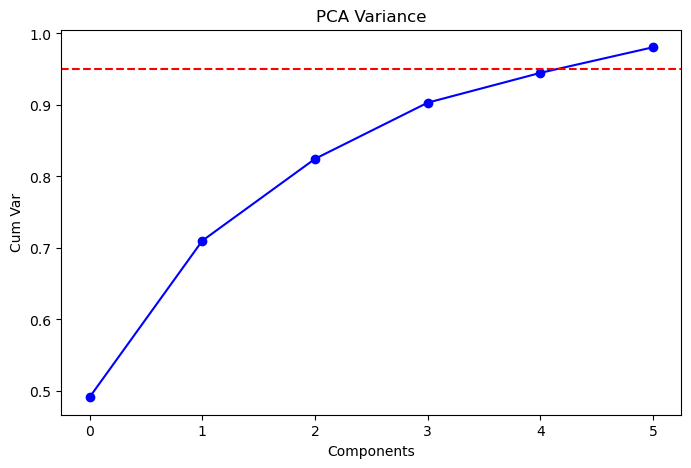

Loadings:
                 PC1   PC2   PC3   PC4   PC5   PC6
energy         0.45  0.01 -0.09 -0.27  0.22  0.04
danceability   0.29 -0.28  0.26  0.75 -0.06 -0.14
loudness       0.41 -0.07  0.04  0.06 -0.06  0.87
acousticness  -0.39 -0.02  0.08  0.21  0.86  0.23
duration_ms    0.09  0.67  0.08  0.21  0.03 -0.02
energy_dance   0.44 -0.12  0.07  0.15  0.26 -0.35
loud_acoustic -0.03 -0.01  0.95 -0.32 -0.02 -0.00
log_duration   0.12  0.67  0.07  0.15 -0.00 -0.00
energy_bin     0.42  0.02 -0.09 -0.35  0.37 -0.20


In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA on Standard scaled
pca = PCA(n_components=0.95)  # 95% variance
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(f"PCA components: {pca.n_components_}, Explained var: {pca.explained_variance_ratio_.sum():.3f}")

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.axhline(0.95, color='r', ls='--')
plt.xlabel('Components'); plt.ylabel('Cum Var'); plt.title('PCA Variance')
plt.show()

# Loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feat_names)
print("Loadings:\n", loadings.round(2))

In [16]:
pd.DataFrame(X_train_pca).to_csv('X_train_pca.csv')


In [17]:
pd.DataFrame(X_test_pca).to_csv('X_test_pca.csv', index=False)

In [18]:
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)